In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
d1 = DataFrame([5, 6, 3, 8, 10, 6, 8, 1, 5, 7, 3, 4, 9, 4, 3, 3, 5])
d1.count()[0]

17

In [3]:
# discrete probability distribution
s1 = d1[0].value_counts()
s1

3     4
5     3
8     2
6     2
4     2
10    1
9     1
7     1
1     1
Name: 0, dtype: int64

In [4]:
d2 = DataFrame(s1)
d2

,0
3,4
5,3
8,2
6,2
4,2
10,1
9,1
7,1
1,1


In [5]:
d2['p'] = d2[0] / d1.count()[0]
d2

,0,p
3,4,0.235294
5,3,0.176471
8,2,0.117647
6,2,0.117647
4,2,0.117647
10,1,0.058824
9,1,0.058824
7,1,0.058824
1,1,0.058824


In [6]:
del d2[0]
d2

,p
3,0.235294
5,0.176471
8,0.117647
6,0.117647
4,0.117647
10,0.058824
9,0.058824
7,0.058824
1,0.058824


In [7]:
d3 = d2.sort_index()
d3

,p
1,0.058824
3,0.235294
4,0.117647
5,0.176471
6,0.117647
7,0.058824
8,0.117647
9,0.058824
10,0.058824


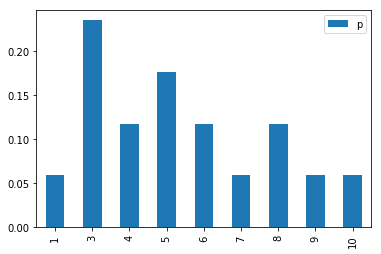

In [8]:
d3.plot(kind='bar')
plt.show()

In [13]:
d4 = DataFrame({
    'x': [0, 1, 2, 3],
    'p': [0.1, 0.2, 0.3, 0.4]
})
d4

,p,x
0,0.1,0
1,0.2,1
2,0.3,2
3,0.4,3


In [14]:
# discrete probablity distribution
# Expected value (Mean)
d4['prob_weight'] = d4['p'] * d4['x']
d4

,p,x,prob_weight
0,0.1,0,0.0
1,0.2,1,0.2
2,0.3,2,0.6
3,0.4,3,1.2


In [15]:
expected_value = d4['prob_weight'].sum()
expected_value

2.0

In [16]:
chocolates_20_weeks = 20 * expected_value
print(chocolates_20_weeks)

40.0


# bernoulli random variable

In [17]:
# flipping a fair coin
# Success - Getting a head - P(H) : 0.5 - p
# Failure - Getting a tail - P(T) : 0.5 - (1-p)
# X = 1 : Got a head
# X = 0 : Got a tail

In [18]:
from scipy.stats import bernoulli

In [37]:
bernoulli.rvs(p=0.5)

1

In [116]:
# biased coin
# p : P(H): 0.9
bernoulli.rvs(p=0.9)

1

In [148]:
# flip 5 coins together
#P(H) = 0.7
bernoulli.rvs(p=0.5, size=5)

array([1, 1, 0, 0, 1])

In [155]:
# expected value
ev = bernoulli.mean(p=0.6)
ev

0.59999999999999998

In [156]:
# variance
print(bernoulli.var(p=0.6))
print(bernoulli.std(p=0.6))

0.24
0.489897948557


In [161]:
# Probability of random variable X = 1 (success) given the success probability is p
print(bernoulli.pmf(k=1, p=0.5))

# Probability of random variable X = 0 (failure) given the success probability is p
print(bernoulli.pmf(k=0, p=0.6)) # biased coin to the success

0.5
0.4


In [162]:
d5 = DataFrame([0.7, 0.3], index=[0, 1])
d5

,0
0,0.7
1,0.3


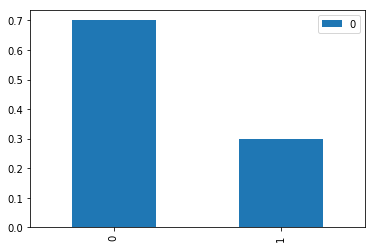

In [163]:
d5.plot(kind='bar')
plt.show()

In [164]:
## How many tails am I expected to get in 20 flips
print(20 * 0.3) 

6.0


In [ ]:
# Binomial random variable

In [165]:
from scipy.stats import binom

In [169]:
# X = # of times got 4 on the face of a die, after rolling it for 10 times
n = 10
p = 1/6

binom.rvs(n=n, p=p, size=10)

array([1, 1, 2, 2, 1, 3, 2, 2, 2, 0])

In [170]:
# Y = # of times got a tail, after flipping the coin for 5 times. Its fair coin with P(success) - p - 0.5
# P(Y=3) = ?
# Probability of getting exactly 3 tails in 5 toses = ?
# k = 3, n = 5
binom.pmf(n=5, k=3, p=0.5)

0.3125

In [172]:
# Y = # of times got a tail, after flipping the coin for 5 times. Its unfair coin with P(success) - p - 0.3
# P(Y=3) = ?
# Probability of getting exactly 3 tails in 5 toses = ?
# k = 3, n = 5
binom.pmf(n=5, k=3, p=0.3)

0.13229999999999992

In [188]:
# Y = # of times got a tail, after flipping the coin for 5 times. Its unfair coin with P(success) - p - 0.8
# P(Y=3) = ?
# Probability of getting exactly 3 tails in 10 toses = ?
# k = 3, n = 5
print(binom.pmf(n=10, k=3, p=0.8))
print(binom.pmf(n=10, k=8, p=0.8))
print(binom.pmf(n=10, k=3, p=0.5))
print(binom.pmf(n=10, k=10, p=1))

0.000786432
0.301989888
0.1171875
1.0


In [190]:
ev = binom.mean(n=10, p=0.8)
ev

8.0

In [191]:
ev = binom.mean(n=10, p=0.5)
ev

5.0

In [192]:
ev = binom.mean(n=10, p=0.2)
ev

2.0

In [195]:
# P(success) - P(T) - 0.5
# n = 10
# Probability of getting tails less than 4 times
# P(k < 4) <=> P(k <= 3) = P(k=0) + P(k=1) + P(k=2) + P(k=3)
print(binom.cdf(n=10, k=3, p=0.5))
print(binom.cdf(n=10, k=3, p=0.9))
print(binom.cdf(n=10, k=3, p=0.4))

0.171875
9.1216e-06
0.3822806016


In [198]:
# P(success) - P(T) - 0.5
# n = 10
# Probability of getting more than 6 tails
# P(k > 6) <=> P(k >= 7) = P(k = 7) + P(k=8) + P(k=9) + P(k=10)
# P(k >= 7) <=> 1 - P(k < 7) <=> 1 - P(k <= 6)
print(1 - binom.cdf(n=10, k=6, p=0.5))
print(binom.sf(n=10, k=6, p=0.5))

0.171875
0.171875
